In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy
sympy.init_printing(use_latex='mathjax')
%matplotlib inline

# Sympy를 사용한 함수 미분

### Data 분석에서 미분이 필요한 이유
- 데이터 분석에는 미분(differentiation)이 필수적이다. 데이터 분석의 목표는 가장 최적의(optimal)모형을 구하는 일이다. 예측 모형은 입력 데이터 이외에도 모수(parameter)라고 하는 숫자를 가진다. 선형 예측 모형에서는 입력 데이터에 대한 가중치가 모수가 된다. 즉 모수를 어떤 숫자로 정하느냐에 따라 예측 모형의 성능이 달라진다. 즉, 모수를 함수의 입력이라고 한다면 성능은 함수의 출력이 된다. 이 때의 함수는 모형의 모수를 입력받아 모형의 성능을 출력하는 함수로 x데이터를 받아 y 데이터를 출력하는 함수와는 다른 함수라는 점에 주의한다.

- 우리가 원하는 것은 성능이 가장 높게 만드는 모수의 값이다. 이렇게 함수의 출력을 가장 크게 만드는 입력값을 찾는 것을 최적화(optimization) 작업이라고 하는데, 최적화를 하려면 미분 혹은 편미분이 유용하기 때문에 미분을 잘 알고 있어야 한다.

- 다행스러운 점은 데이터 분석에서 필요한 미분의 수준은 그다지 높지 않다는 점이다. 선형 다항식이나 지수 함수의 편미분 정도만 알고 있으면 되고, 대부분의 경우 최적화 라이브러리를 사용하거나, theano, tensorflow등의 라이브러리에도 도함수와 미분값을 계산해 주기 때문에 실제로 직접 미분을 계산하는 일은 많지 않다.

## 기울기 (Slope)

- 최적화를 하는 가장 이상적인 방법은 가능한 모든 x값을 넣어서 y값을 계산해 보고, 이 중에서 가장 큰 혹은 가장 작은 y값을 출력하게 만드는 x의 값을 골라내는 것이다. 이러한 방식을 그리드서치(grid search)라고 한다. 하지만, 그리드 서치를 하려면 엄청나게 많은 연산을 해야 하므로 현실적으로는 사용할 수 없다. 대신 x의 값을 몇가지만 시도해서 그 중 가장 좋은 값을 구하는 수치적 최적화라는 방법을 사용하게 된다. 

- 수치적 최적화를 하려면 현재 사용한 x의 값이 아닌 또 다른 x의 값을 시도할 때 어떤 값을 시도해야 할 지를 결정해야 한다. 그러려면, x를 증가시켰을 때 y 값이 증가하는지 감소하는지, 증가한다면 어느 정도 증가하는 지를 알아야 한다. 즉 함수에 들어가는 입력변수의 값이 달라지면 함수의 출력 값이 어떻게 변하는지를 알아야 한다. 이를 기울기(slope) 혹은 민감도(sensitivity)라고 한다. 

- 만약 입력변수의 값이 x에서 x2로 달라졌다고 가정하자. 출력 변수는 f(x)이라는 값에서 f(x2)라는 값으로 달라질 것이다. 이를 비율로 나타내면 다음과 같다. 여기에서 dx= x2 - x이다.
- y의 변화량 / x의 변화량 = f(x2) - f(x) / x2 - x = f(x+dx) - f(x) / dx

- 이러한 변화율은 x2를 x1에서 얼마나 멀리 떨어져 있는가 즉, dx의 값에 따라 달라진다. 이를 해결하기 위해 ***기울기(slope)***라는 개념을 사용한다. 기울기는 dx값이 0으로 근접할 때의 변화율을 말한다. 기호로는 다음처럼 쓴다. 
- 기울기 = lim dx -> 0 (f(x+dx) - f(x) / dx)

- 이번에는 기울기를 함수의 그래프에서 살펴보자. 함수의 그래프는 앞에서 그린 것 처럼 부드러운 곡선(curve)의 형태로 나타나는 경우가 많다. 이 곡선에 대해 한 점만 공통으로 가지는 접선(tangent)을 그릴 수 있는데, 이 접선이 수평선과 이루는 기울기는 접선이 x 방향으로 이동한 거리와 y방향으로 이동한 거리의 비율을 말한다. 
- 기울기 = 접선이y방향으로 이동한 거리 / 접선이 x방향으로 이동한 거리
- 다음 그림에서 x = 0과 x = 1에서의 기울기는 각각1, -2이다.
- x = 0에서의 기울기 1/1 = 1
- x = 1에서의 기울기 -2/1 = -2

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


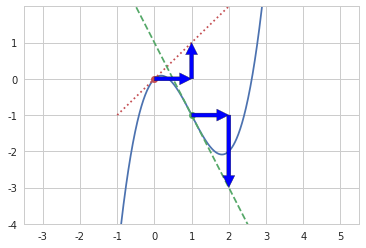

In [42]:
def f(x):
    return x**3 - 3*x**2 + x

x = np.linspace(-1, 3, 400)
y = f(x)

plt.plot(x, y)
plt.plot(0, 0, 'ro') # (0,0) red circle
plt.plot(x, x, 'r:') # 빨간 점선
plt.plot(1, -1, 'go') # (1,-1) green circle
plt.plot(x, (3*1 ** 2-6*1+1) * (x-1)-1, 'g--') #녹색 점선

plt.xlim(-3.5, 5.5)
plt.ylim(-4, 2)
plt.xticks(np.arange(-3, 6))
plt.yticks(np.arange(-4, 2))

plt.annotate('', xy=(1, 0), xytext=(0, 0), arrowprops=dict(facecolor='blue'))
plt.annotate('', xy=(1, 1), xytext=(1, 0), arrowprops=dict(facecolor='blue'))
plt.annotate('', xy=(2, -1), xytext=(1, -1), arrowprops=dict(facecolor='blue'))
plt.annotate('', xy=(2, -3), xytext=(2, -1), arrowprops=dict(facecolor='blue'))

plt.show()

### 수치 미분

- scipy.misc.derivative 명령을 사용하면 수치적으로 대략적인 미분값을 계산할 수 있다. 인수로는 기울기를 구하고자 하는 함수 f, 기울기를 구할 위치 x, 기울기를 구하기 위해 이동할 거리 dx를 받는다. 기울기는 다음 수식으로 구한다.
- f(x+0.5dx) - f(x-0.5dx) / dx
- dx 인수의 값이 너무 크거나 너무 작으면 정확한 값을 구하지 못할 수 있다.

In [15]:
from scipy.misc import derivative
derivative(f, -0.5, dx=1e-6)

4.749999999886789

In [16]:
derivative(f, 0, dx=1e-6)

1.000000000001

In [17]:
derivative(f, 0.5, dx=1e-6)

-1.2499999999804334

In [18]:
derivative(f, 1, dx=1e-6)

-2.000000000002

In [19]:
derivative(f, 1.5, dx=1e-6)

-1.2500000001747225

In [20]:
derivative(f, 2, dx=1e-6)

1.000000000139778

In [21]:
derivative(f, 2.5, dx=1e-6)

4.749999999553722

### 미분

- **미분(differenciation)**이란 어떤 함수로부터 그 함수와 연관성이 있는 새로운 함수를 만들어내는 작업이다. 미분을 통해 만들어진 새로운 함수는 원래 함수의 기울기(slope)를 나타낸다. 미분으로 만들어진 함수를 원래 함수의 도함수(derivative)라고 한다. 원래는 수렴(converge)과 극한(limit)이라는 수학적인 개념을 사용하여 미분을 정의하지만 여기에서는 자세한 설명을 생략한다.

- 도함수는 원래 함수에 프라임(prime)를 붙이거나 원래 함수의 앞에 d/dx를 붙여서 표시한다. 분수처럼 표기하기도 하는데 분모의 위치에는 미분하고자 하는 변수가 오고 분자의 위치에는 미분하는 함수 자체의 기호나 혹은 계산의 결과로 얻어지는 출력 변수를 넣는다. 예를 들어 y=f(x)라는 함수를 미분하여 구한 도함수는 다음과 같이 여러가지 방법으로 표기할 수 있다. 이 식에서는 f'는 "f프라임(prime)"이라고 읽고 df/dx는 'df over dx'라고 읽는다.
- f' = d/dx*f(x) = d/dx*f = df/dx = d/dx(y) = d/dx*y = dy/dx
- 위치 x에서 도함수의 값 f'(x)은 그 위치에서의 함수의 기울기와 같으므로 다음처럼 쓸 수 있다.
f'(x) = f(x)의 기울기

### 미분 공식
- 몇가지 미분 공식을 조합하면 복잡한 함수의 도함수도 쉽게 구할 수 있다. 여기에서는 가장 핵심적인 4가지 공식만을 소개한다.
    - 기본 미분 공식
    - 선형 조합 법칙
    - 곱셈 법칙
    - 연쇄 법칙

#### 기본 미분 공식
- 상수
상수를 미분하면 0이 된다.
- d/dx(c) = 0

- 거듭제곱
x의 n제곱을 미분하면 n-1 제곱으로 제곱수가 1씩 감소한다. 이 공식은 n이 자연수이거나 음의 정수 일 때 성립한다. n = 0일 때는 성립하지 않는다.
- d/dx(x^n) = nx^(n-1)

- log (로그)
로그함수를 미분하면 x^-1이 된다.
- d/dx(logx) = 1/x

- 지수(e)
밑이 오일러 수인 지수함수는 미분해도 변하지 않는다.
- d/dx(e^x) = e^x

#### 선형 조합 법칙
- 어떤 함수에 상수를 곱한 함수를 미분한 결과는 원래 함수의 도함수에 그 상수를 곱한 것과 같다.
- d/dx(cf) = c*d/df(f)

- 어떤 두 함수를 더한 함수를 미분한 결과는 원래 함수의 도함수를 더한 것과 같다.
- d/dx(f1 + f2) = d/dx(f1) + d/dx(f2)

- 위의 결과를 합치면 어떤 함수에 각각 상수를 곱한 후 더한 **선형 조합(linear combination)**은 각 함수의 도함수를 선형 조합한 것과 같다. 
- d/dx(c1f1+c2f2) = c1*d/df*f1 + c2*d/df*f2

- 이러한 기본 공식을 사용하여 다음 함수를 미분하면,
- y = 1 + 2x + 3x^2 + 4 exp(x) + 5log(x)
- y' = 2 + 6x + 4exp(x) + 5/x

- 이 방법으로 위에서 그래프를 그렸던 함수의 도함수를 구하면 다음과 같다.
- f(x) = x^3 -3x^2 + x
- f'(x) = 3*x^2 - 6*x + 1
- 도함수의 값이 기울기와 일치하는 것을 알 수 있다.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


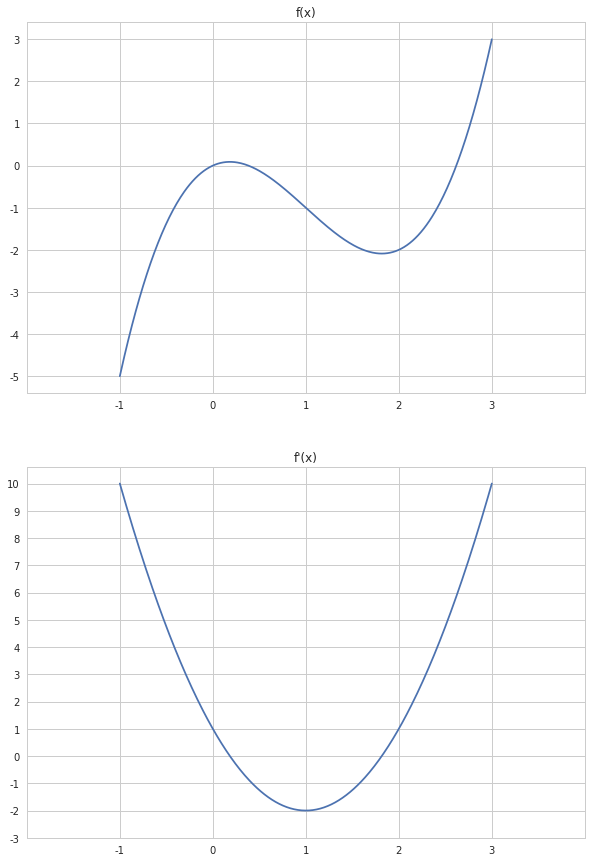

In [43]:
def fprime(x):
    return 3*x**2 - 6*x+1

x = np.linspace(-1, 3, 400)

plt.figure(figsize=(10,15))

plt.subplot(211)
plt.plot(x, f(x))
plt.xlim(-2,4)
plt.xticks(np.arange(-1,4))
plt.yticks(np.arange(-5,4))
plt.title('f(x)')

plt.subplot(212)
plt.plot(x, fprime(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1,4))
plt.yticks(np.arange(-3,11))
plt.title("f'(x)")

plt.show()

#### 곱셈 법칙
- 어떤 함수의 형태가 두 개의 함수를 곱한 것과 같을 때는 다음과 같이 각 개별 함수의 도함수를 사용하여 원래의 함수의 도함수를 구한다. 이를 곱셈법칙이라고 한다.
- d/dx*(f*g) = f* dg/dx + df/dx * g
- 곱셈 법칙을 사용하면 다음과 같은 함수를 미분하여,
- f = x*e^x
- 다음과 같은 도함수를 구한다
- df/dx = xe^x + e^e

#### 연쇄법칙
- 연쇄 법칙(Chain Rule)은 미분하고자 하는 함수의 입력 변수가 다른 함수의 출력 변수인 경우 적용할 수 있다. 
- f(x) = h(g(x))
- df/dx = dh/dg * dg/dx
- for example) f = exp((x-u)^2/sigma^2)
- f'= 2(x-u)/sigma^2 * exp((x-u)^2/sigma^2)

#### 연쇄법칙의 예: 로그함수의 미분
- d/dxlogf(x) = f'(x)/f(x)

In [38]:
a, b, x = sympy.symbols('a, b, x')
f = sympy.exp(a*x ** b)
sympy.simplify(sympy.diff(f, x))

               b
     b - 1  a⋅x 
a⋅b⋅x     ⋅ℯ    

#### 2차 도함수
- 도함수를 한 번 더 미분하여 만들어진 함수를 2차 도함수 (second derivative)라고 한다. 2차 도함수는 2개의 prime 기호를 붙이거나 d^2/dx^2 기호로 표시한다.

- 예를 들어 y = f(x) 라는 함수를 두번 미분하여 구한 2차 도함수는 다음과 같이 표기.
- f'' = d^2/dx^2(f) = d^2/dx^2*f = d^2f/dx^2 = d^2/dx^2(y) = d^2/dx^2*y = d^2y/dx^2

- 2차 도함수는 도함수의 기울기를 나타낸다. 즉 도함수 값이 증가하면 2차 도함수 값음 양수이고, 도함수 값이 감소하면 2차 도함수 값은 음수이다. 2차 도함수 값이 양수인 경우를 볼록 (convex)하다고 하며 2차 도함수 값이 음수인 경우를 오목 (concave)하다고 한다. 이 때 볼록과 오목은 아래에서 바라본 관점이다. 
- 다음 예제의 함수는 f''(x)가 음수인 구간(x < 1)에서 오목(concave)하고 f''(x)가 양수인 구간(x>1)에서 볼록(convex)하다 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


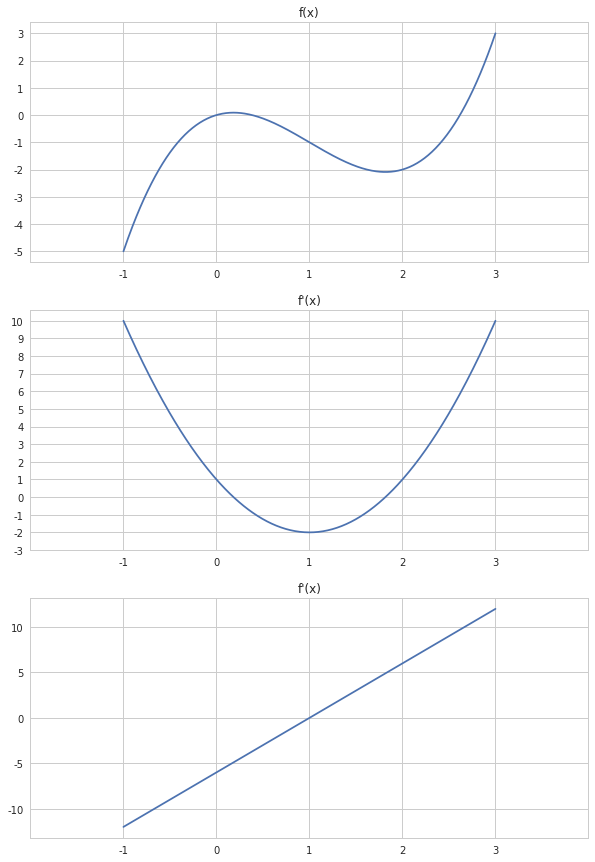

In [46]:
def fprime2(x):
    return 6*x - 6

x = np.linspace(-1, 3, 400)

plt.figure(figsize=(10,15))

plt.subplot(311)
plt.plot(x, f(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))
plt.title('f(x)')

plt.subplot(312)
plt.plot(x, fprime(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-3, 11))
plt.title("f'(x)")

plt.subplot(313)
plt.plot(x, fprime2(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.title("f'(x)")

plt.show()

##  편미분 (Partial Differentiation)

- 만약 함수가 두 개 이상의 독립변수를 가지는 다변수 함수인 경우에도 미분 즉, 기울기는 하나의 변수에 대해서만 구할 수 있다. 이를 편미분(partial differentiation)이라고 한다. 따라서 편미분의 결과로 하나의 함수에 대해 여러 개의 도함수가 나올 수 있다.

- 편미분의 결과 즉 도함수는 독립 변수를 함수의 아랫첨자로 써서 표기하거나 round기호를 사용하여 표기한다. x, y두 개의 독립 변수를 가지는 함수 f(x,y)의 편미분 도함수는 다음과 같이 표기한다.
- fx(x,y) = round(f)/round(x)
- fy(x,y) = round(f)/round(y)

- 편미분을 하는 방법은 변수가 하나인 함수의 미분과 같다. 다만, 어떤 하나의 독립변수에 대해 미분할 때는 다른 독립 변수를 상수로 생각하면 된다. 예를 들어 x,y라는 두 개의 독립 변수를 가지는 함수엣 x로 편미분 할 때는 y는 독립 변수가 아닌 상수로 생각한다. 마찬가지로 y로 편미분을 할 떄는 x는 독립 변수가 아닌 상수로 생각한다.
- f(x,y) = x^2 + 4xy + 4y^2
- fx(x,y) = 2x + 4y
- fy(x,y) = 4x + 8y

- 편미분에 대해서도 2차 도함수를 정의할 수 있다. 편미분의 2차 도함수를 구할 때는 각각의 미분에 쓰이는 독립 변수를 자유롭게 선택할 수 있다.
- 첫번째 미분과 두번째 미분에서 모두 x에 대해 미분하면 다음과 같이 표기한다.
- fxx(x,y) = round^2f/roundx^2 = 2
- fyy(x,y) = round^2f/roundy^2 = 8
- fxy(x,y) = round^2f/roundyroundx = 4
- fyx(x,y) = round^2f/roundxroundy = 4

In [51]:
x, y = sympy.symbols('x y')
f = sympy.exp((x**2) + 2 * (y ** 2))
sympy.diff(sympy.diff(f,x), x)

       2      2       2      2
   2  x  + 2⋅y       x  + 2⋅y 
4⋅x ⋅ℯ          + 2⋅ℯ         

In [52]:
sympy.diff(sympy.diff(f,x), y)

        2      2
       x  + 2⋅y 
8⋅x⋅y⋅ℯ         

In [53]:
sympy.diff(sympy.diff(f, y), x)

        2      2
       x  + 2⋅y 
8⋅x⋅y⋅ℯ         

In [54]:
sympy.diff(sympy.diff(f, y), y)

        2      2       2      2
    2  x  + 2⋅y       x  + 2⋅y 
16⋅y ⋅ℯ          + 4⋅ℯ         

#### Sympy
- SymPy는 심볼릭 연산 (symbolic operation)을 지원하기 위한 파이썬 package. 심볼릭 연산이란 사람이 연필로 계산하는 미분/적분과 동일한 형태의 연산을 말한다. 즉 X^2의 미분 연산을 수행하며 그 결과가 2x라는 형태로 출력된다. Deep learning등에 많이 사용되는 파이썬의 theano package나 Tensorflow 패키지도 기울기 함수 계산을 위해 이러한 심볼릭 연산 기능을 갖추고 있다.

In [55]:
import sympy
# Jupyter 노트북에서 수학식의 LaTex 표현을 위해 필요함
sympy.init_printing(use_latex='mathjax')

- 심볼릭 연산에서 사용하는 심볼릭 변수(symbolic variable)는 일반 프로그래밍에서 사용하는 변수와 다르다 일반 프로그래밍에서 사용하는 변수는 이미 메모리에 씌여있는 어떤 숫자를 기호로 쓴 것에 지나치지 않지만 심볼릭 변수는 아무런 숫자도 대입이 되어 있지 않다. 따라서 x^2의 미분 연산을 수행하기 위해서는 우선 Sympy의 symbols명령을 사용하여 x라는 기호가 단순한 숫자나 벡터 변수가 아닌 심볼(symbol)임을 알려주어야 한다. 이렇게 정의된 심볼 변수 symbol클래스 자료형이 된다.

In [56]:
x = sympy.symbols('x')
x

x

In [57]:
type(x)

sympy.core.symbol.Symbol

- 일단 심볼 변수를 정의하면 이를 사용하여 다음과 같이 함수를 정의한다. 이 때는 수학 함수는 Sympy전용 함수를 사용해야 한다.

In [58]:
f = x * sympy.exp(x)
f

   x
x⋅ℯ 

- 함수가 정의되면 diff함수로 미분을 할 수 있다. 또한 simplify함수를 써서 소인수 분해 등을 통한 수식 정리가 가능하다

In [59]:
sympy.diff(f)

   x    x
x⋅ℯ  + ℯ 

In [60]:
sympy.simplify(sympy.diff(f))

         x
(x + 1)⋅ℯ 

- 편미분을 하는 경우에는 어떤 변수로 미분하는지를 diff함수로 명시해야 한다. Symbols명령을 사용할 떄는 인수로 주는 문자열에 여러개의 심볼 변수를 동시에 넣을 수도 있다.

In [61]:
x, y = sympy.symbols('x y')
f = x ** 2 + 4 * x * y + 4 *  y ** 2
f

 2              2
x  + 4⋅x⋅y + 4⋅y 

In [62]:
sympy.diff(f, x)

2⋅x + 4⋅y

In [63]:
sympy.diff(f, y)

4⋅x + 8⋅y

- 상수 심볼을 포함하는 함수를 미분하는 경우, Sympy는 어떤 심볼이 상수이고 어떤 심볼이 변수인지 알 수 없기 때문에 편미분인 것처럼 입력 변수를 지정해야 한다.

In [64]:
x, mu, sigma = sympy.symbols('x mu sigma')
f = sympy.exp((-mu + x) ** 2 / sigma ** 2)
f

         2
 (-μ + x) 
 ─────────
      2   
     σ    
ℯ         

In [65]:
sympy.diff(f, x)

                      2
              (-μ + x) 
              ─────────
                   2   
                  σ    
(-2⋅μ + 2⋅x)⋅ℯ         
───────────────────────
            2          
           σ           

In [67]:
sympy.simplify(sympy.diff(f, x))

                   2
            (μ - x) 
            ────────
                2   
               σ    
2⋅(-μ + x)⋅ℯ        
────────────────────
          2         
         σ          

- 이차 도함수는 다음처럼 구한다.

In [68]:
sympy.diff(f, x, x)

                           2
                    (μ - x) 
                    ────────
  ⎛             2⎞      2   
  ⎜    2⋅(μ - x) ⎟     σ    
2⋅⎜1 + ──────────⎟⋅ℯ        
  ⎜         2    ⎟          
  ⎝        σ     ⎠          
────────────────────────────
              2             
             σ              

#### 연습 문제 5
- 다음 함수를 미분한 도함수를 sympy를 사용하여 구하라. 여기서 k, a, b는 변수가 아니라 상수이다. 
- 1. f(x) = x^3 - 1
- 2. f(x) = log(x^2 - 3k)
- 3. f(x) = exp(ax^b)

In [75]:
# 1. f(x) = x^3 - 1
import sympy
sympy.init_printing(use_latex='mathjax') # 기본 설정값
x = sympy.symbols('x')
f = x ** 3 - 1
sympy.diff(f, x)

   2
3⋅x 

In [76]:
# 2. f(x) = log(x^2 - 3k)
import sympy
sympy.init_printing(use_latex='mathjax')
x, k = sympy.symbols('x k')
f = sympy.log(x ** 2 - 3 * k)
sympy.diff(f, x)

   2⋅x   
─────────
        2
-3⋅k + x 

In [80]:
# 3. f(x) = exp(ax^b)
import sympy
sympy.init_printing(use_latex='mathjax')
x, a, b = sympy.symbols('x a b')
f = sympy.exp(a*x**b)
sympy.simplify(sympy.diff(f, x))

               b
     b - 1  a⋅x 
a⋅b⋅x     ⋅ℯ    

In [82]:
# 연습문제 6
# 다음 함수에 대한 1차, 2차 편미분 Sympy를 구하라
# fx, fy, fxx, fxy, fyx, fyy를 Sympy로 활용
# f(x, y) = exp(x^2 + 2y^2)

# 1) fx
import sympy
sympy.init_printing(use_latex='mathjax')
x, y = sympy.symbols('x y')
f = sympy.exp(x ** 2 + 2 * y ** 2)
f

  2      2
 x  + 2⋅y 
ℯ         

In [83]:
#1 fx
sympy.diff(f, x)

      2      2
     x  + 2⋅y 
2⋅x⋅ℯ         

In [84]:
#2 fy
sympy.diff(f, y)

      2      2
     x  + 2⋅y 
4⋅y⋅ℯ         

In [85]:
#3 fxx
sympy.diff(f, x, x)

               2      2
  ⎛   2    ⎞  x  + 2⋅y 
2⋅⎝2⋅x  + 1⎠⋅ℯ         

In [86]:
#4 fxy
sympy.diff(f, x, y)

        2      2
       x  + 2⋅y 
8⋅x⋅y⋅ℯ         

In [87]:
#5 fyx
sympy.diff(f, y, x)

        2      2
       x  + 2⋅y 
8⋅x⋅y⋅ℯ         

In [88]:
#6 fyy
sympy.diff(f, y, y)

               2      2
  ⎛   2    ⎞  x  + 2⋅y 
4⋅⎝4⋅y  + 1⎠⋅ℯ         